In [572]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.special import boxcox, inv_boxcox
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [573]:
df = pd.read_csv("btc_data_2012-01-01_to_2021-03-31.csv")
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [574]:
df.shape

(4857377, 8)

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [576]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [577]:
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.index = df.Timestamp

df_month = df.resample('M').mean()

df_year = df.resample('A-DEC').mean()


In [578]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2011-12-31 to 2021-03-31
Freq: M
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          112 non-null    datetime64[ns]
 1   Open               112 non-null    float64       
 2   High               112 non-null    float64       
 3   Low                112 non-null    float64       
 4   Close              112 non-null    float64       
 5   Volume_(BTC)       112 non-null    float64       
 6   Volume_(Currency)  112 non-null    float64       
 7   Weighted_Price     112 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 7.9 KB


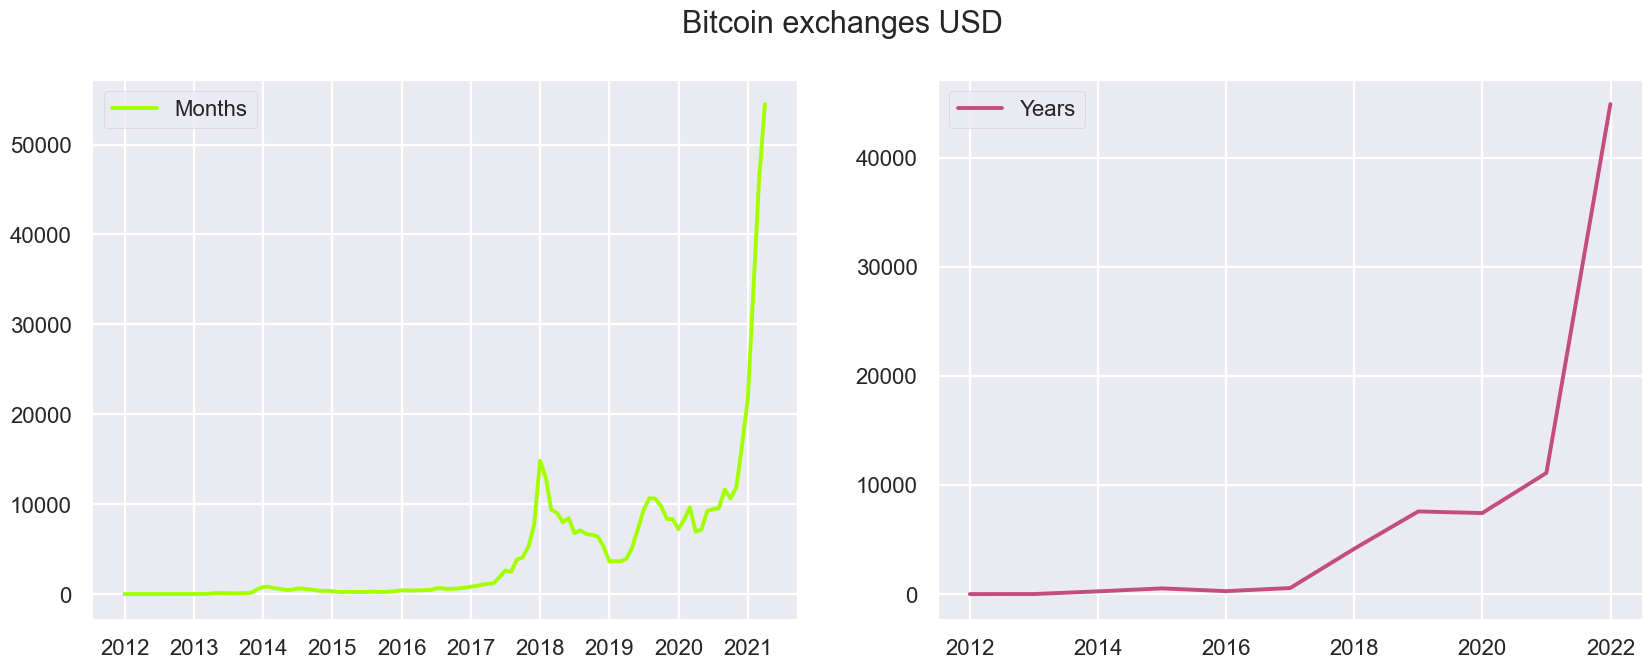

In [579]:
fig = plt.figure(figsize=[20, 7])
plt.suptitle('Bitcoin exchanges USD', fontsize=22)


plt.subplot(121)
plt.plot(df_month.Weighted_Price, '-', label='Months', color = '#A3FF00')
plt.legend()



plt.subplot(122)
plt.plot(df_year.Weighted_Price, '-', label='Years', color = '#C24E7B')
plt.legend()

# plt.tight_layout()
plt.show()

Тест Дики-Фуллера: p=0.998833


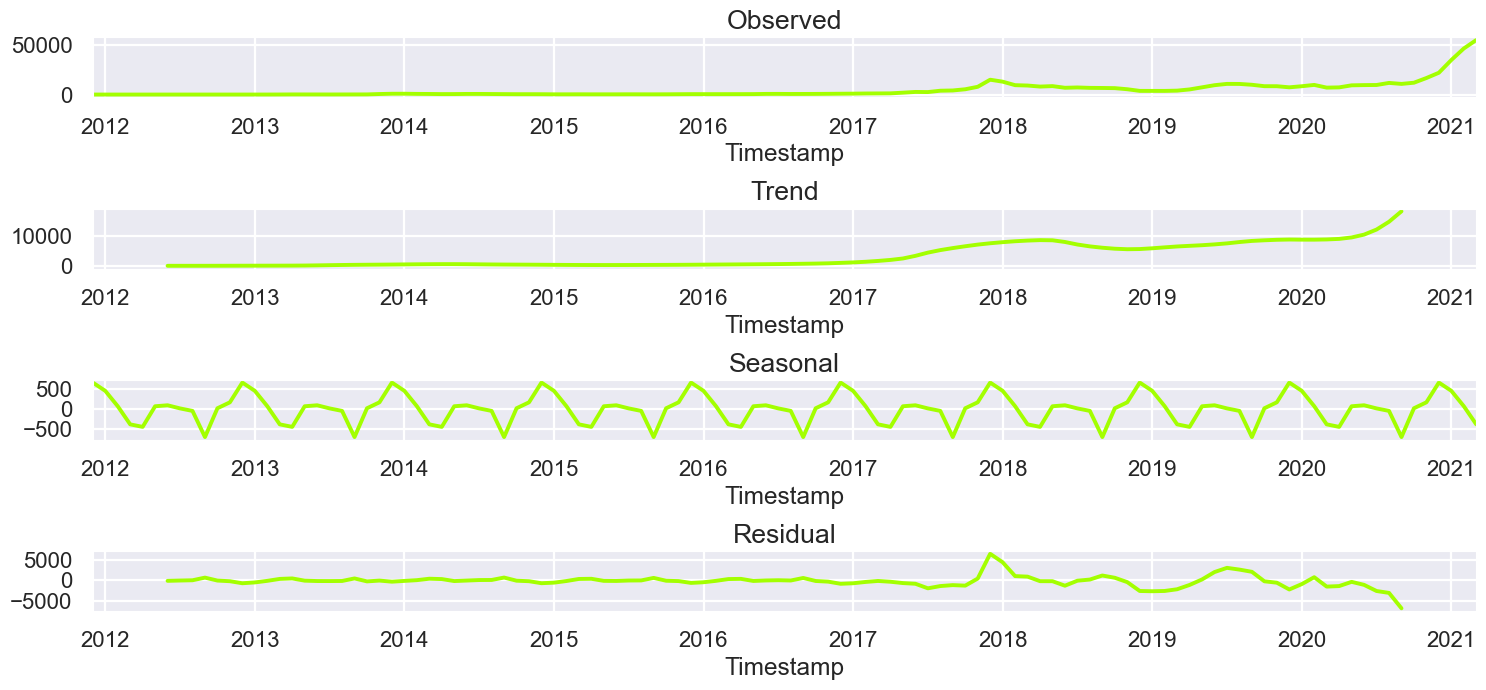

In [580]:
decomposition = sm.tsa.seasonal_decompose(df_month.Weighted_Price)
fig, axes = plt.subplots(4, 1, figsize=[15, 7])

decomposition.observed.plot(ax=axes[0], color = '#A3FF00' )
decomposition.trend.plot(ax=axes[1], color= '#A3FF00')
decomposition.seasonal.plot(ax=axes[2], color= '#A3FF00')
decomposition.resid.plot(ax=axes[3], color='#A3FF00')

axes[0].set_title("Observed")
axes[1].set_title("Trend")
axes[2].set_title("Seasonal")
axes[3].set_title("Residual")

print("Тест Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

plt.tight_layout()
plt.show()


Тест Дики-Фуллера: p=0.998833


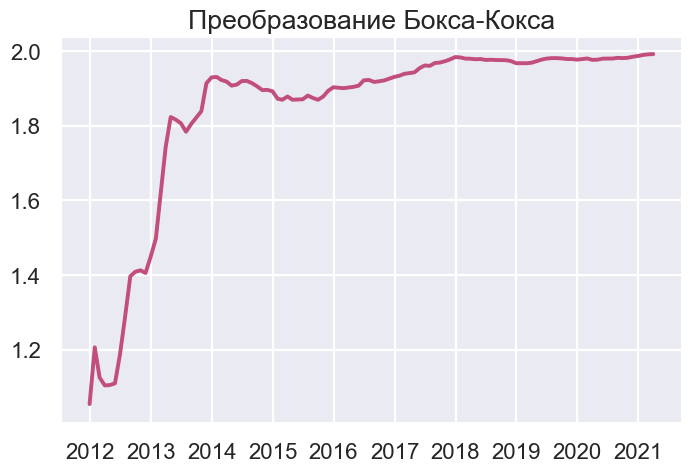

In [581]:
plt.figure(figsize = [8, 5])
plt.title('Преобразование Бокса-Кокса')
plt.plot(boxcox(df_month.Weighted_Price, -0.5), color = '#C24E7B')
df_month['Weighted_Price_box'], lmbd = stats.boxcox(df_month.Weighted_Price)
print("Тест Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

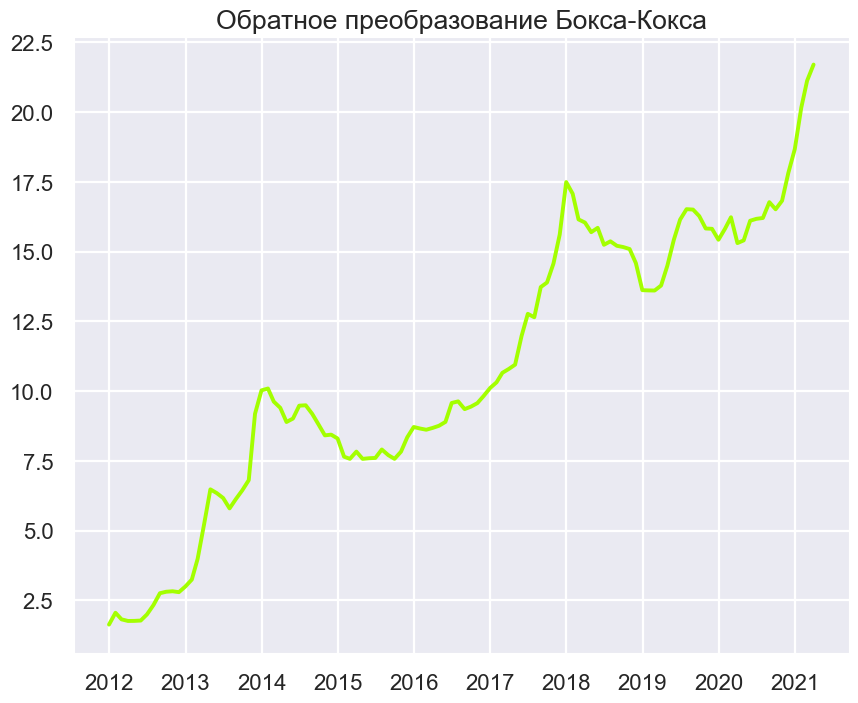

In [619]:
plt.figure(figsize = (10, 8))
plt.title('Обратное преобразование Бокса-Кокса')
plt.plot(inv_boxcox(boxcox(df_month.Weighted_Price_box, -0.5), -0.5), color='#A3FF00')

In [583]:
#Мимо
#Попробуем продифференцировать, избавясь от сезонности
df_month['Weighted_Price_box_diff1'] = df_month.Weighted_Price_box - df_month.Weighted_Price_box.shift(12)
print("Тест Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price_box_diff1[12:])[1])

Тест Дики-Фуллера: p=0.442190


In [584]:
#Еще раз дифференцируем
df_month['Weighted_Price_box_diff2'] = df_month.Weighted_Price_box_diff1 - df_month.Weighted_Price_box_diff1.shift(1)  
print("Тест Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price_box_diff2[13:])[1])

Тест Дики-Фуллера: p=0.000025


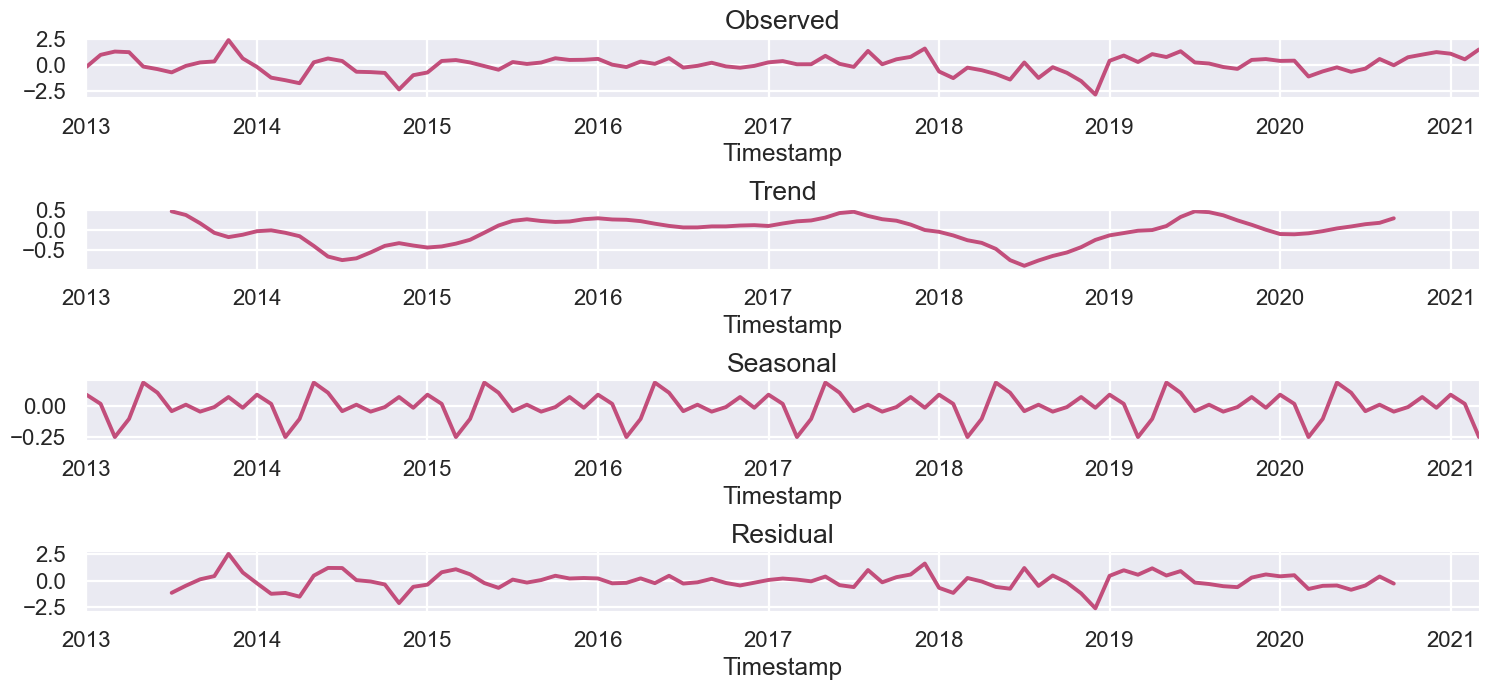

In [585]:
decomposition = sm.tsa.seasonal_decompose(df_month.Weighted_Price_box_diff2[13:])
fig, axes = plt.subplots(4, 1, figsize=[15, 7])

decomposition.observed.plot(ax=axes[0], color='#C24E7B')
decomposition.trend.plot(ax=axes[1], color='#C24E7B')
decomposition.seasonal.plot(ax=axes[2], color='#C24E7B')
decomposition.resid.plot(ax=axes[3], color='#C24E7B')

axes[0].set_title("Observed")
axes[1].set_title("Trend")
axes[2].set_title("Seasonal")
axes[3].set_title("Residual")


plt.tight_layout()
plt.show()

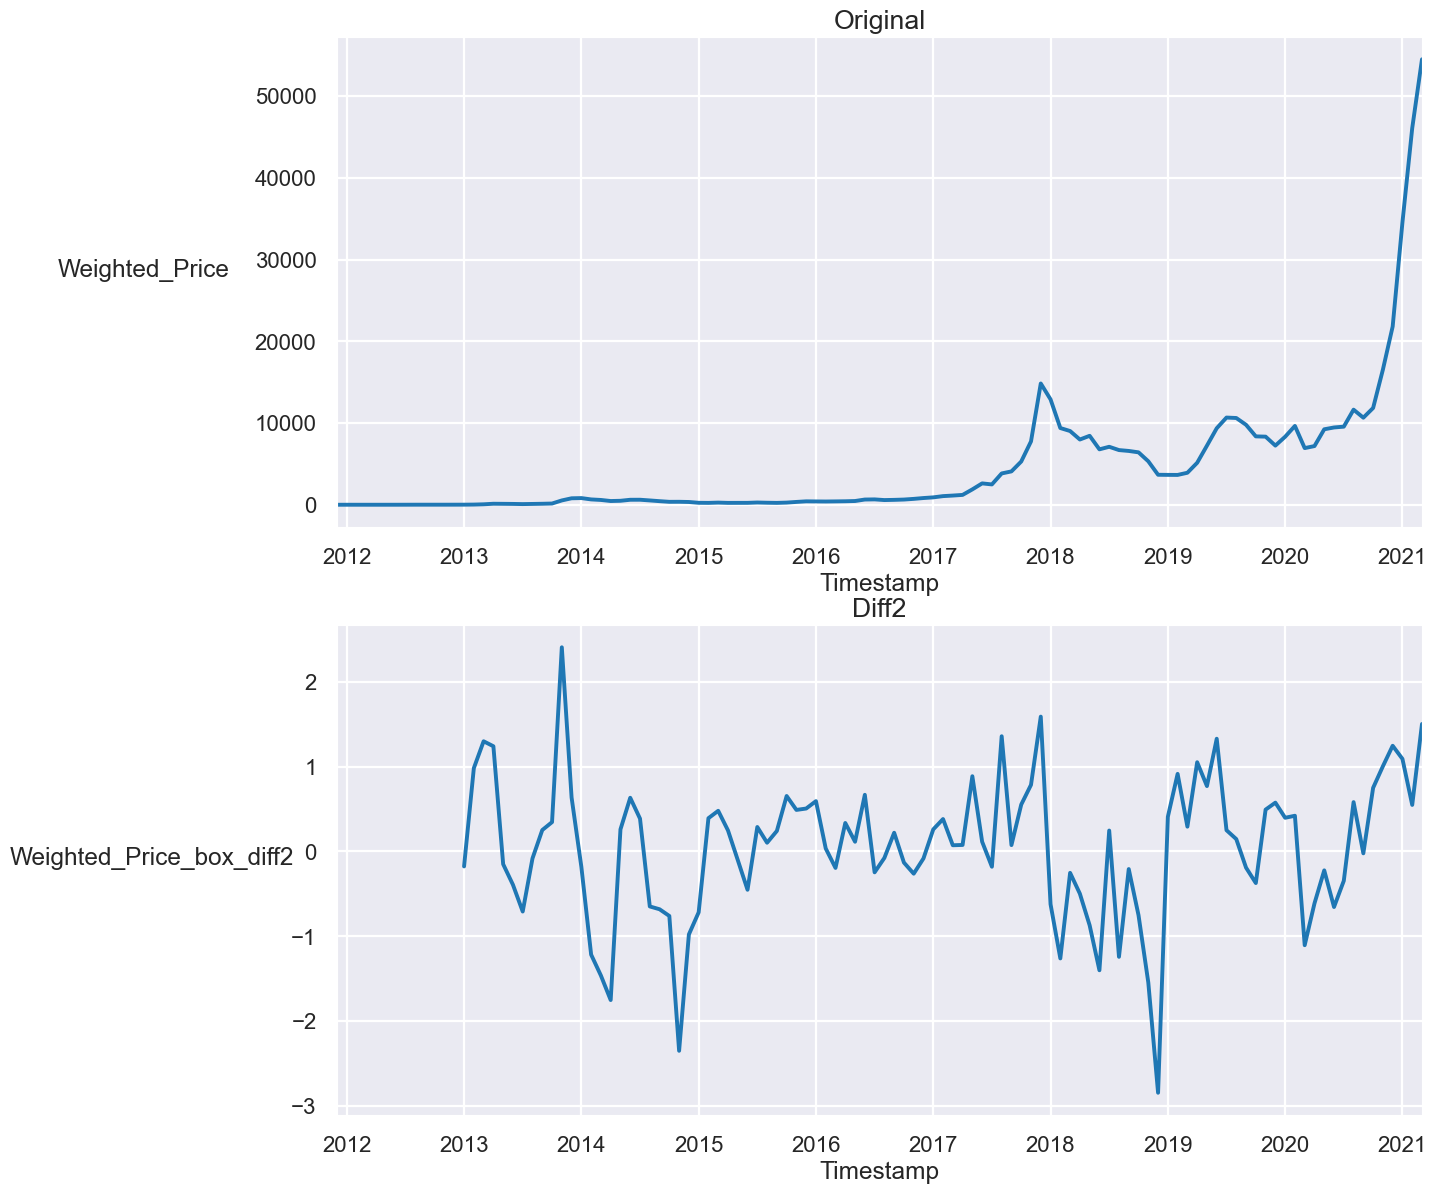

In [586]:
plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

ax = plt.subplot(211)
ax.set_title('Original')
ax.set_ylabel('Weighted_Price', rotation=0, labelpad=80)
df_month.Weighted_Price.plot(ax=ax);

ax = plt.subplot(212)
ax.set_title('Diff2')
ax.set_ylabel('Weighted_Price_box_diff2', rotation=0, labelpad=100)
df_month.Weighted_Price_box_diff2.plot(ax=ax);

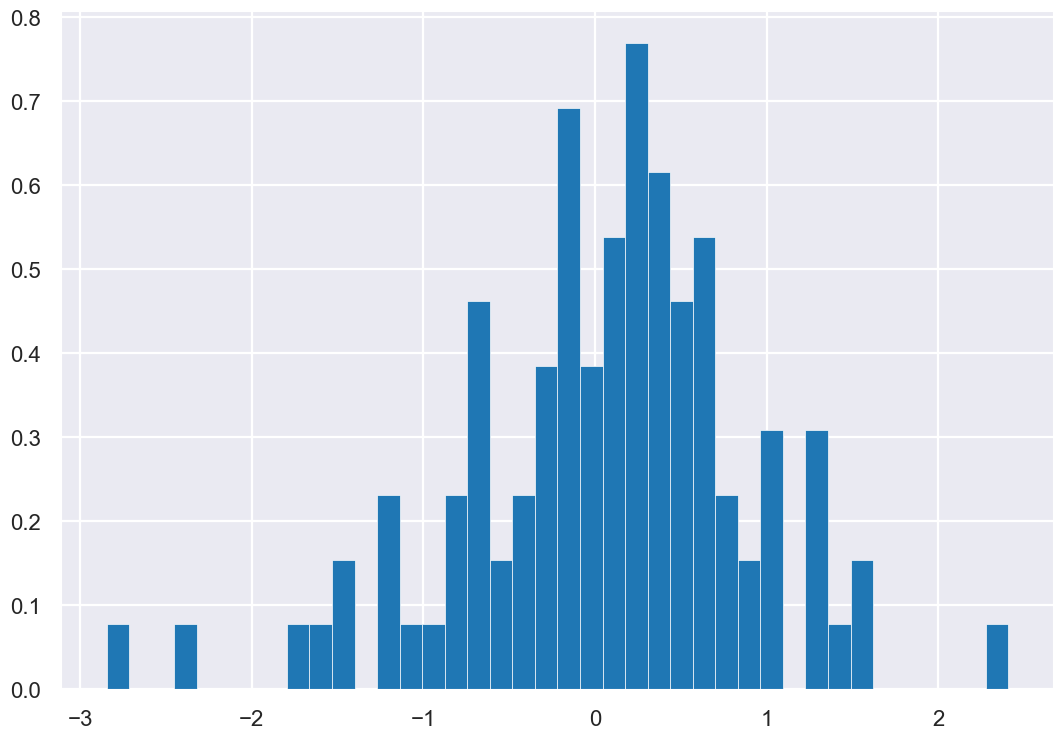

In [587]:
plt.hist(df_month.Weighted_Price_box_diff2, density=True, bins=40);
#Похоже на нормальное распределение (визуально по форме колокола)

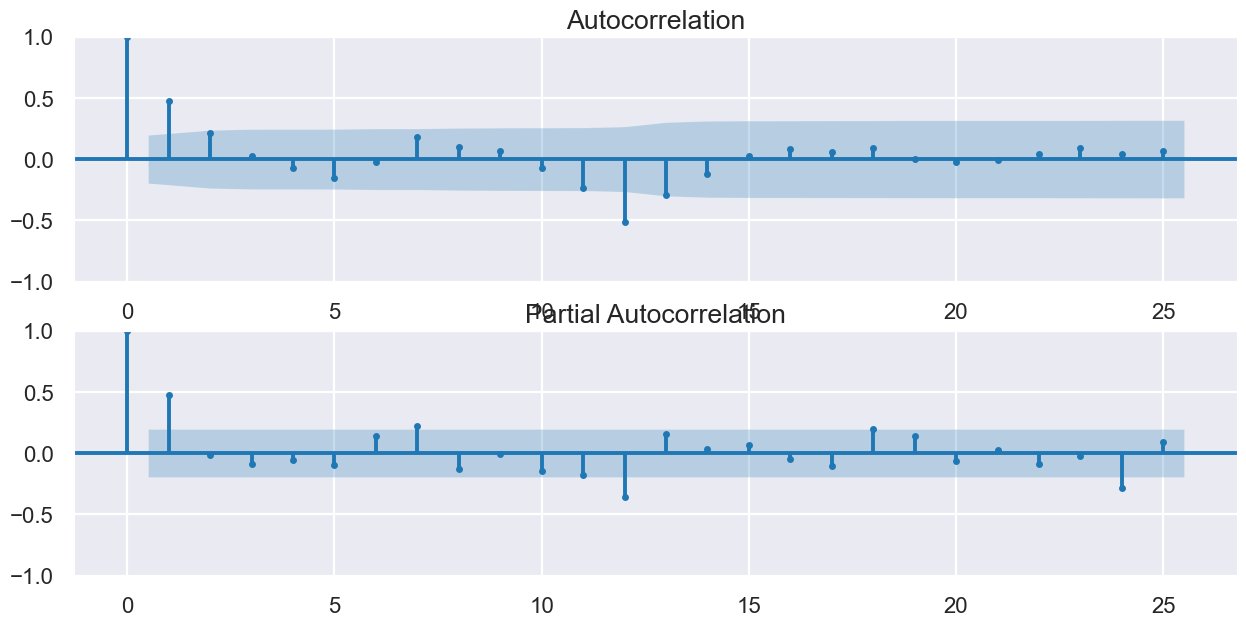

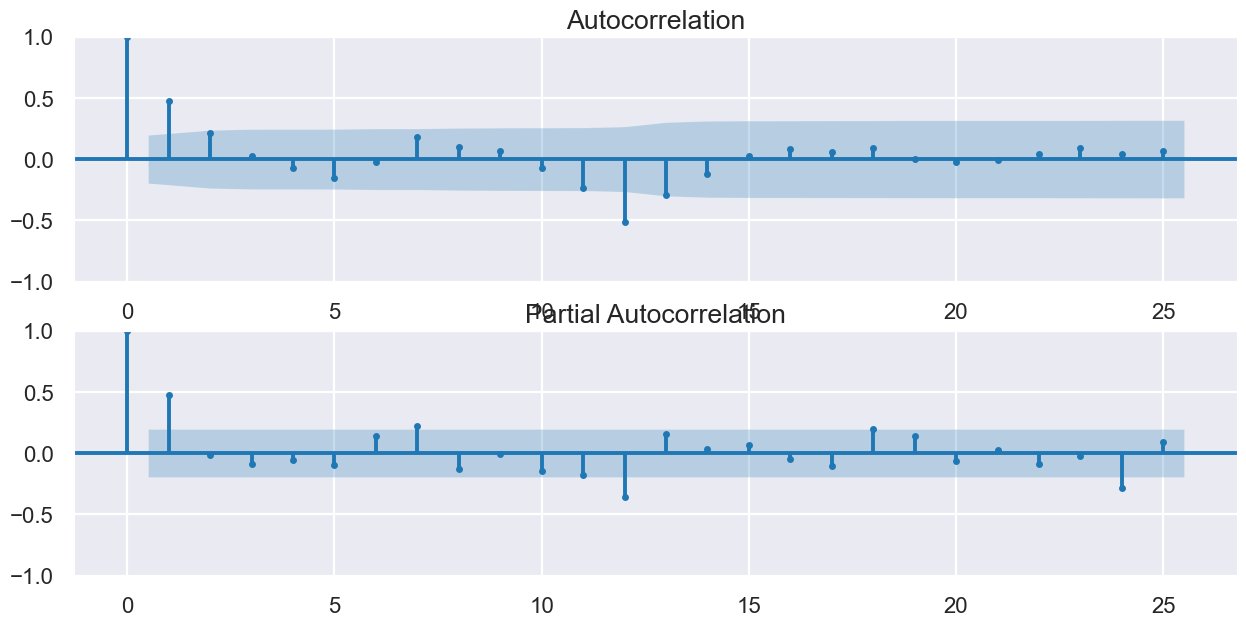

In [588]:
# Построим корелограмму и проверим наличие значимых корреляций
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.Weighted_Price_box_diff2[13:].values.squeeze(), lags=25, ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.Weighted_Price_box_diff2[13:].values.squeeze(), lags=25, ax=ax)

In [589]:
qs = range(0, 3)
ps = range(0, 3)
d = 1 
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

#Выбор модели
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = sm.tsa.ARIMA(df_month.Weighted_Price_box, order=(param[0], d, param[1])).fit()
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])


In [590]:
#Лучшая модель
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

  parameters         aic
3     (1, 0)  163.904315
7     (2, 1)  164.199838
4     (1, 1)  165.827508
6     (2, 0)  165.847536
8     (2, 2)  166.125461
                               SARIMAX Results                                
Dep. Variable:     Weighted_Price_box   No. Observations:                  112
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -79.952
Date:                Mon, 23 Oct 2023   AIC                            163.904
Time:                        14:58:08   BIC                            169.323
Sample:                    12-31-2011   HQIC                           166.103
                         - 03-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4684      0.065      7.211      0.000      

Тест Дики-Фуллера: p=0.000000


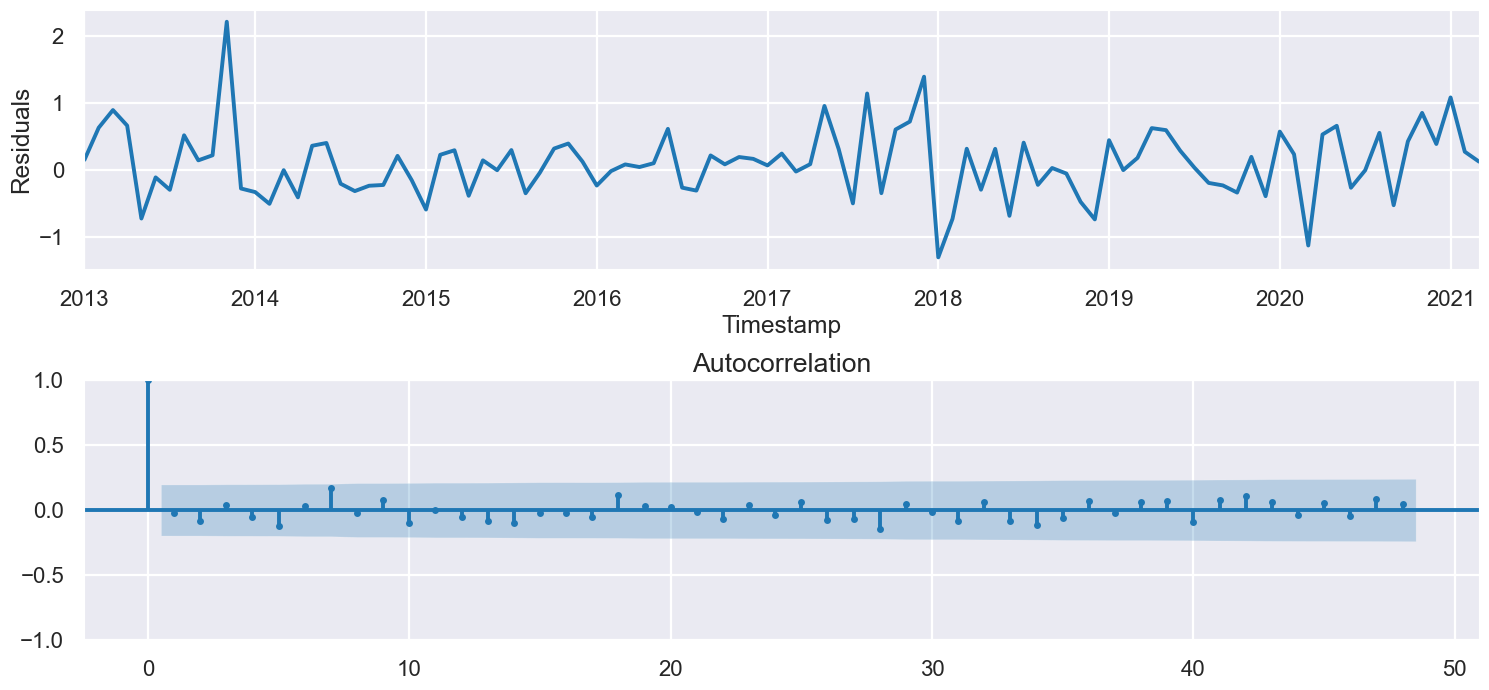

In [591]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Тест Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

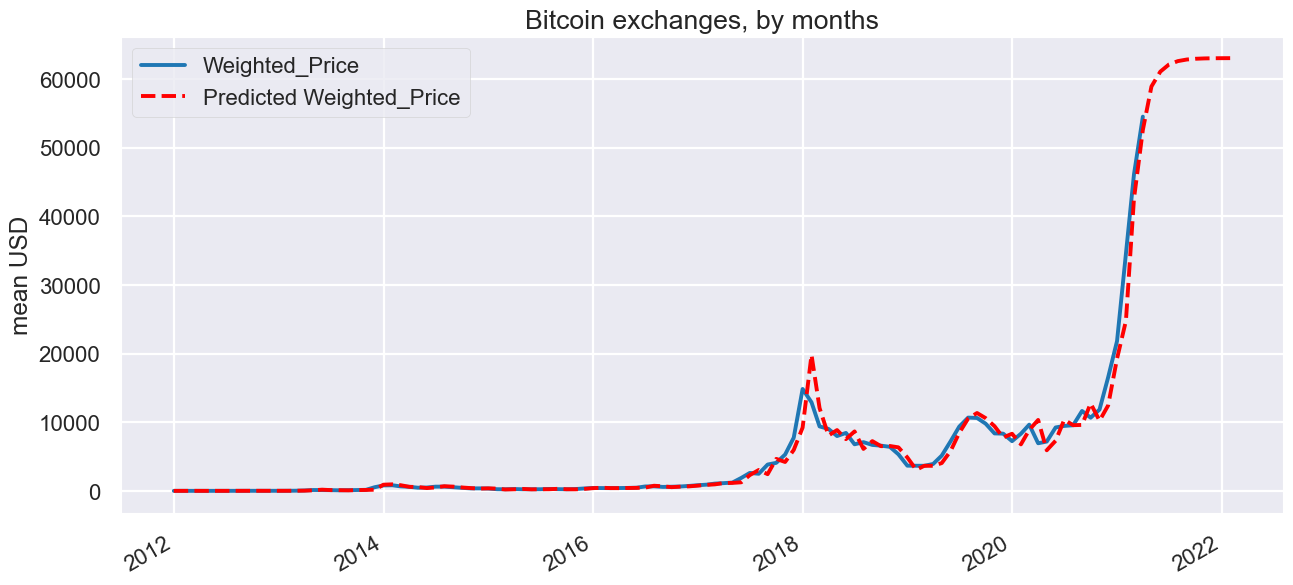

In [592]:
df_month2 = df_month[['Weighted_Price']]

date_list = [datetime(2021, 4, 30), datetime(2021, 5, 31), datetime(2021, 6, 30), datetime(2021, 7, 31), 
             datetime(2021, 8, 31), datetime(2021, 9, 30), datetime(2021, 10, 31), datetime(2021, 11, 30),
             datetime(2021,12, 31), datetime(2022,1, 31), datetime(2022,5, 31), datetime(2022,10, 31),datetime(2023,1, 31)]


future = pd.DataFrame(index=date_list, columns= df_month.columns)

df_month2 = pd.concat([df_month2, future])

df_month2['forecast'] = inv_boxcox(best_model.predict(start=0, end=121), lmbd)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

In [593]:
df = df_month.Weighted_Price
df

Timestamp
2011-12-31        4.471603
2012-01-31        6.345955
2012-02-29        5.228443
2012-03-31        4.984397
2012-04-30        4.995091
                  ...     
2020-11-30    16535.990325
2020-12-31    21811.782847
2021-01-31    34552.337249
2021-02-28    46075.783298
2021-03-31    54499.282182
Freq: M, Name: Weighted_Price, Length: 112, dtype: float64

In [594]:
from sklearn.metrics import mean_squared_error
def AR(p, df):
    df_temp = df.copy()

    for i in range(1, p + 1):
        df_temp['Shifted_values_%d' % i] = df_temp['Weighted_Price'].shift(i)

    train_size = int(0.8 * df_temp.shape[0])

    df_train = df_temp[0:train_size].copy()
    df_test = df_temp[train_size:df.shape[0]].copy()

    df_train_2 = df_train.dropna()
    X_train = df_train_2.iloc[:, 1:].values.reshape(-1, p)
    y_train = df_train_2.iloc[:, 0].values.reshape(-1, 1)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    theta = lr.coef_.T
    intercept = lr.intercept_
    df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_

    X_test = df_test.iloc[:, 1:].values.reshape(-1, p)
    df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_

    RMSE = np.sqrt(mean_squared_error(df_test['Weighted_Price'], df_test['Predicted_Values']))

    print("The RMSE is:", RMSE, "Value of p:", p)
    
    return [df_train_2, df_test, theta, intercept, RMSE]

In [595]:
from sklearn.linear_model import LinearRegression
def MA(q,res):
    for i in range(1, q + 1):
        res[f'Shifted_values_{i}'] = res['Residuals'].shift(i)

    train_size = int(0.8 * res.shape[0])

    res_train = res.iloc[:train_size, :].copy()
    res_test = res.iloc[train_size:, :].copy()

    res_train.dropna(inplace=True)
    X_train = res_train.iloc[:, 1:].values
    y_train = res_train.iloc[:, 0].values

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    theta = lr.coef_
    intercept = lr.intercept_
    res_train['Predicted_Values'] = lr.predict(X_train)

    X_test = res_test.iloc[:, 1:].values
    res_test['Predicted_Values'] = lr.predict(X_test)

    res_test[['Residuals', 'Predicted_Values']].plot()

    from sklearn.metrics import mean_squared_error
    RMSE = np.sqrt(mean_squared_error(res_test['Residuals'], res_test['Predicted_Values']))

    print("The RMSE is:", RMSE, ", Value of q:", q)
    return [res_train, res_test, theta, intercept, RMSE]



In [634]:
df_testing = pd.DataFrame(boxcox(df_month.Weighted_Price, -0.5).diff(12).diff())
print("Тест Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df_testing.Weighted_Price.dropna())[1])

Тест Дики-Фуллера: p=0.004751


<Axes: xlabel='Timestamp'>

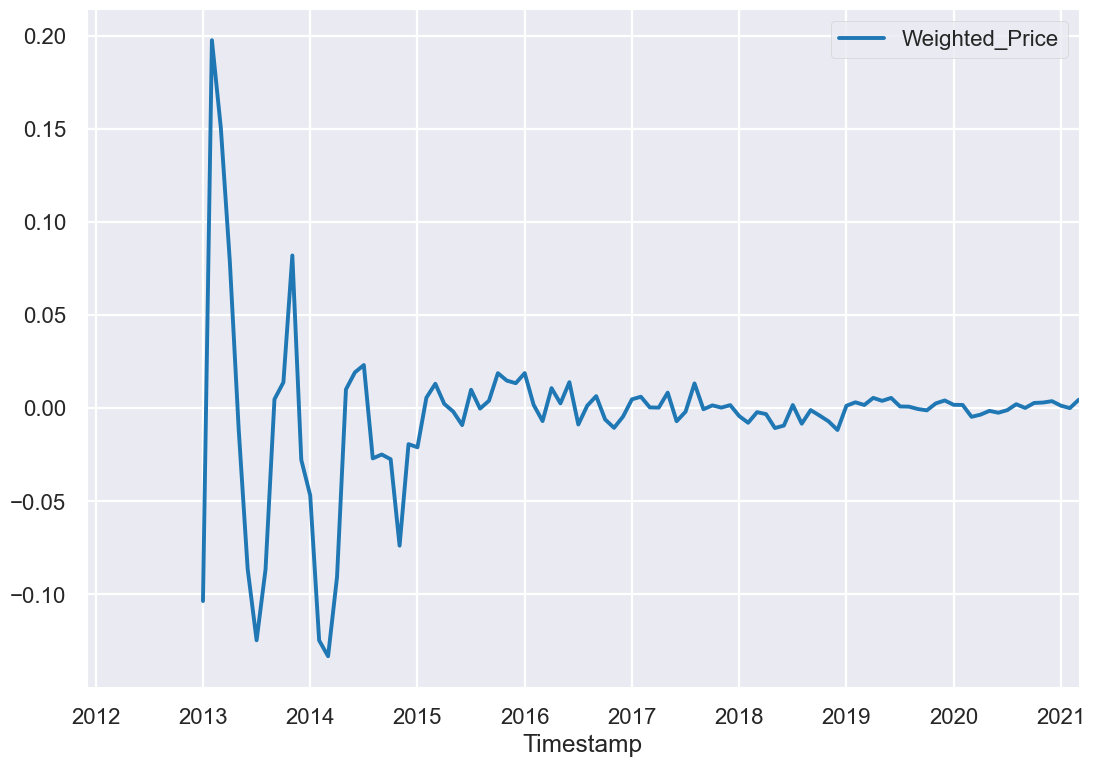

In [635]:
df_testing.plot()


In [636]:
[df_train,df_test,theta,intercept,RMSE] = AR(1,pd.DataFrame(df_testing.Weighted_Price))

The RMSE is : 0.002879195379799418 , Value of p :  1


<Axes: xlabel='Timestamp'>

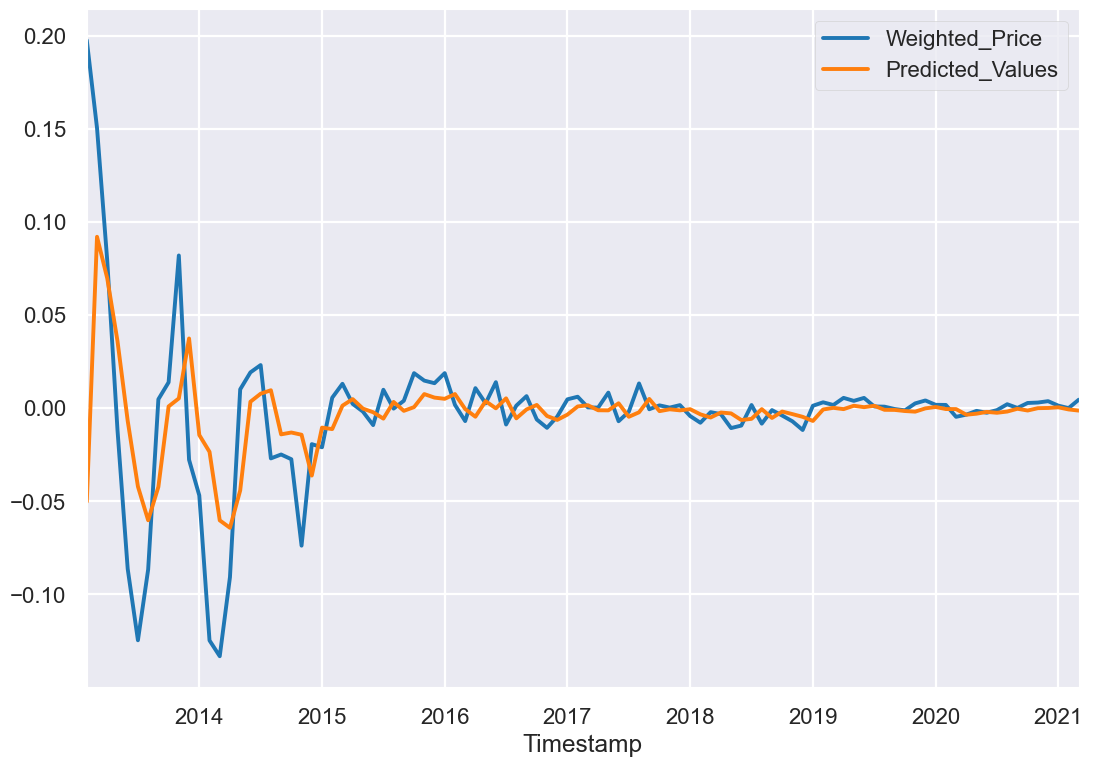

In [637]:
df_c = pd.concat([df_train,df_test])
df_c[['Weighted_Price','Predicted_Values']].plot()

In [638]:
res = pd.DataFrame()
res['Residuals'] = df_c.Weighted_Price - df_c.Predicted_Values

<Axes: ylabel='Density'>

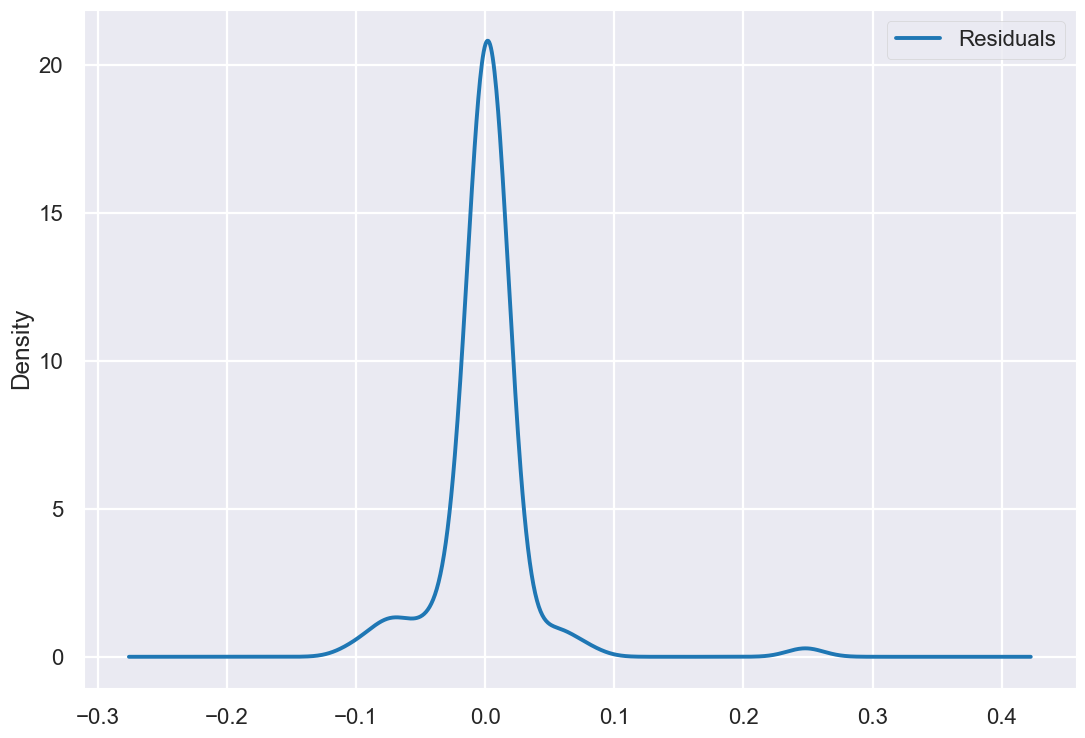

In [639]:
res.plot(kind='kde')

The RMSE is : 0.004400119069274898 , Value of q :  3
[[ 0.33362053]
 [ 0.22196152]
 [-0.38329383]]
[-0.0020588]


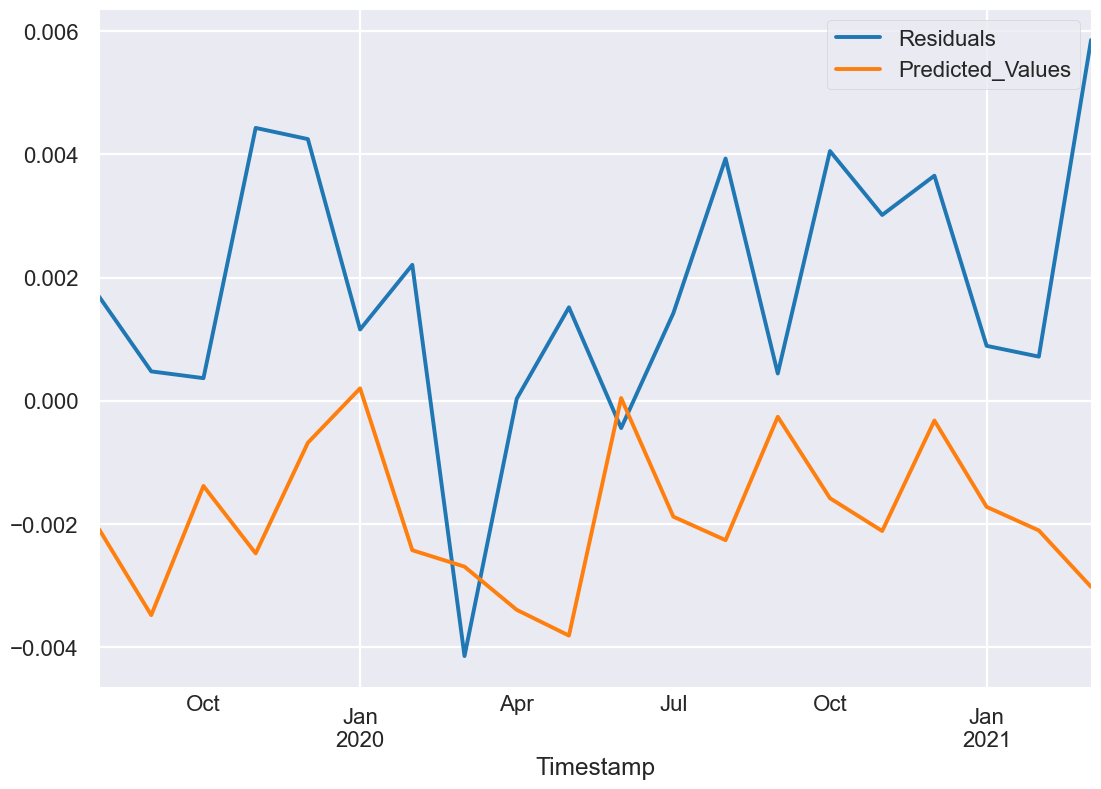

In [640]:
[res_train,res_test,theta,intercept,RMSE] = MA(3,pd.DataFrame(res.Residuals))
print(theta)
print(intercept)

In [641]:
res_c = pd.concat([res_train,res_test])

In [642]:
df_c.Predicted_Values += res_c.Predicted_Values

<Axes: xlabel='Timestamp'>

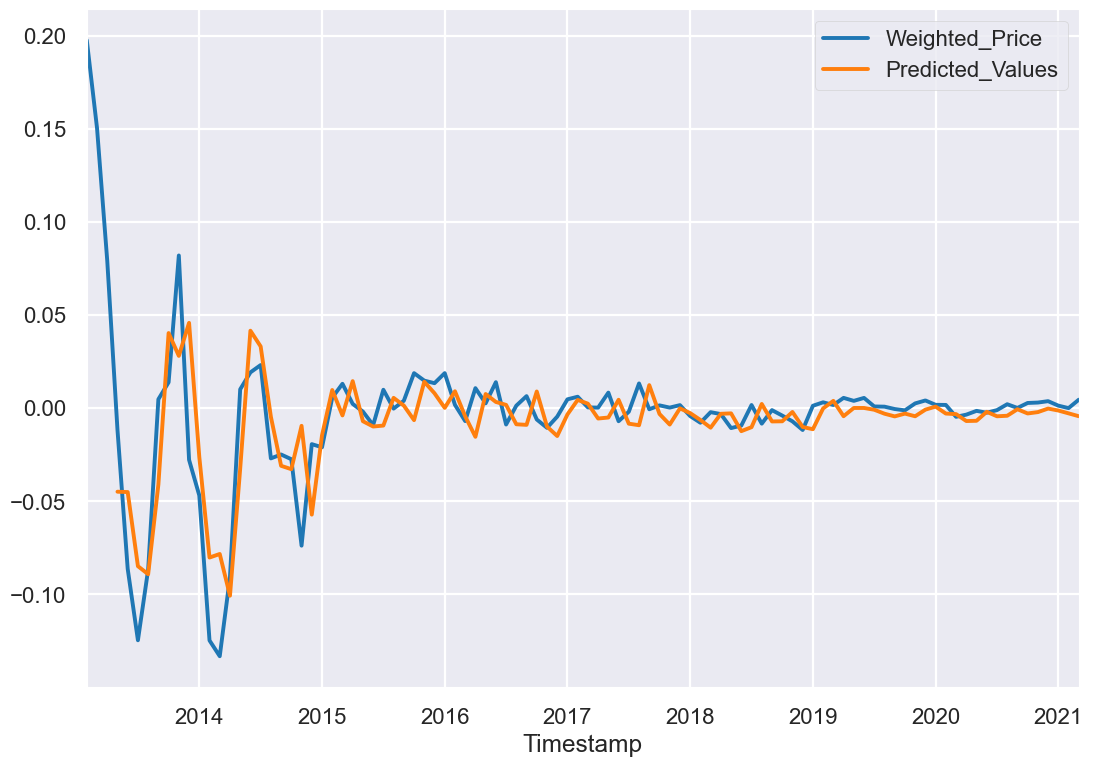

In [643]:
df_c[['Weighted_Price','Predicted_Values']].plot()

In [644]:
inv_boxcox_transformed = inv_boxcox(boxcox(df_month.Weighted_Price_box, -0.1), -0.1)


df_c['Predicted_Values'] += inv_boxcox_transformed.shift(1)
df_c['Predicted_Values'] += inv_boxcox_transformed.diff().shift(12)
df_c['Predicted_Values'] = np.exp(df_c['Predicted_Values'])
df_c.Weighted_Price = df_month.Weighted_Price

<Axes: xlabel='Timestamp'>

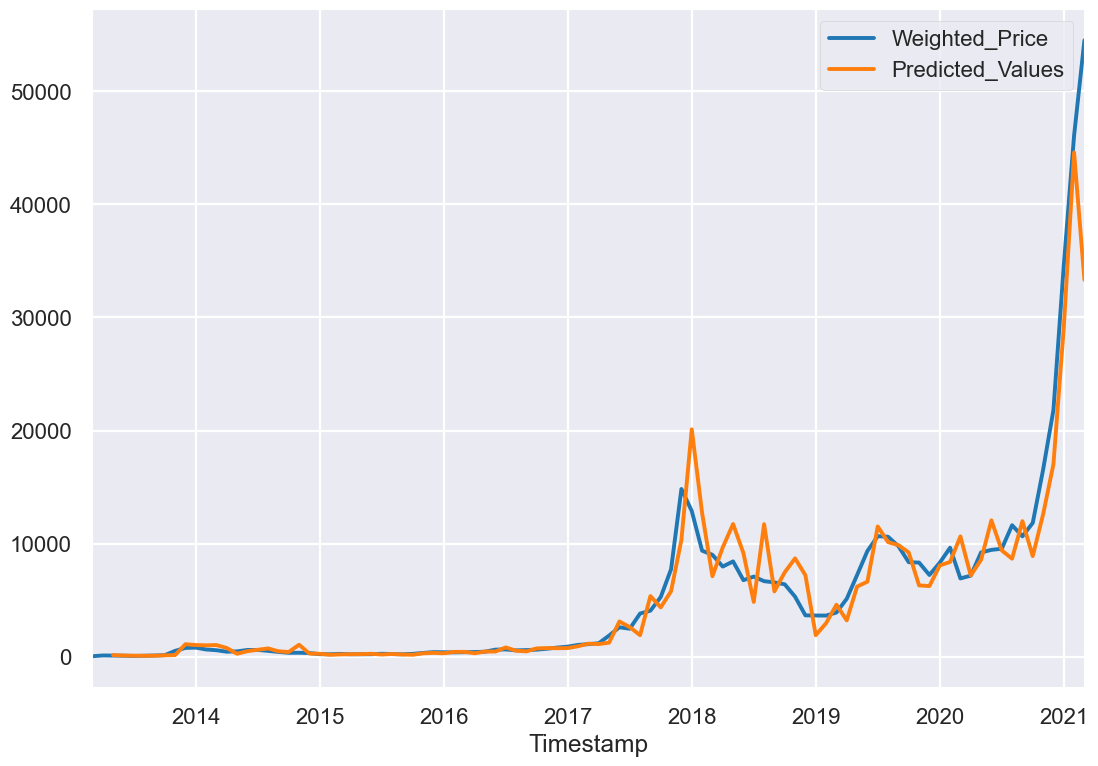

In [632]:
df_c.iloc[1:,:][['Weighted_Price','Predicted_Values']].plot()